In [1]:
import numpy as np

# importing pandas for manipulation of data
import pandas as pd

# importing matplotlib for visualizing data
import matplotlib.pyplot as plt
%matplotlib inline

# import seaborn
import seaborn as sns

#importing warnings to avoid displaying warnings
import warnings
warnings.filterwarnings(action='ignore')


# display all columns of the dataframe
pd.options.display.max_columns=None

# display all rows of the dataframe
pd.options.display.max_rows = None

#displaying Standard Scaler for scaling data
from sklearn.preprocessing import StandardScaler

#importing train test split from scikit learn
from sklearn.model_selection import train_test_split

#importing statistics library from scipy library
import scipy.stats as st

# Importing Scikit Libraries for model building and performance metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB  
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import RandomOverSampler

# Importing RFE to select the most significant features
from sklearn.feature_selection import RFE


In [2]:
df=pd.read_csv('Employee-turnover.csv')

In [3]:
df.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,Distance From Home (kms),Job Involvement,Job Level,Job Satisfaction,Monthly Income (USD),Salary Hike (%),Stock Option Level,Over Time,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,1,High,2,Very High,5993,11,0,Yes,2,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,8,Medium,2,Medium,5130,23,1,No,1,10,10,7,1,7,High,3,Better,Very High,No
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,2,Medium,1,High,2090,15,0,Yes,6,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,3,High,1,High,2909,11,0,Yes,1,8,8,7,3,0,Very High,3,Better,High,No
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,2,High,1,Medium,3468,12,1,No,9,6,2,2,2,2,Low,3,Better,Very High,No


In [4]:
df.shape

(1470, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Employee Count              1470 non-null   int64 
 1   Employee ID                 1470 non-null   int64 
 2   Department                  1470 non-null   object
 3   Job Role                    1470 non-null   object
 4   Gender                      1470 non-null   object
 5   Age                         1470 non-null   int64 
 6   Marital Status              1470 non-null   object
 7   Education                   1470 non-null   object
 8   Education Field             1470 non-null   object
 9   Business Travel             1470 non-null   object
 10  Distance From Home (kms)    1470 non-null   int64 
 11  Job Involvement             1470 non-null   object
 12  Job Level                   1470 non-null   int64 
 13  Job Satisfaction            1470 non-null   obje

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Employee Count,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
Employee ID,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Distance From Home (kms),1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Job Level,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
Monthly Income (USD),1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
Salary Hike (%),1470.0,14.951701,3.533904,10.0,12.00,14.0,17.00,25.0
Stock Option Level,1470.0,0.793878,0.852077,0.0,0.00,1.0,1.00,3.0
No. of Companies Worked,1470.0,2.689116,2.494231,0.0,1.00,2.0,4.00,9.0
Total Working Years,1470.0,11.279592,7.780782,0.0,6.00,10.0,15.00,40.0


In [7]:
df.isnull().sum()

Employee Count                0
Employee ID                   0
Department                    0
Job Role                      0
Gender                        0
Age                           0
Marital Status                0
Education                     0
Education Field               0
Business Travel               0
Distance From Home (kms)      0
Job Involvement               0
Job Level                     0
Job Satisfaction              0
Monthly Income (USD)          0
Salary Hike (%)               0
Stock Option Level            0
Over Time                     0
No. of Companies Worked       0
Total Working Years           0
Years At Company              0
Years In Current Role         0
Years Since Last Promotion    0
Years With Curr Manager       0
Environment Satisfaction      0
Training Times Last Year      0
Work Life Balance             0
Relationship Satisfaction     0
Attrition (Yes/No)            0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Employee Count', 'Employee ID', 'Department', 'Job Role', 'Gender',
       'Age', 'Marital Status', 'Education', 'Education Field',
       'Business Travel', 'Distance From Home (kms)', 'Job Involvement',
       'Job Level', 'Job Satisfaction', 'Monthly Income (USD)',
       'Salary Hike (%)', 'Stock Option Level', 'Over Time',
       'No. of Companies Worked', 'Total Working Years', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager', 'Environment Satisfaction',
       'Training Times Last Year', 'Work Life Balance',
       'Relationship Satisfaction', 'Attrition (Yes/No)'],
      dtype='object')

In [10]:
#UNIVARIATE ANALYSIS

In [11]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

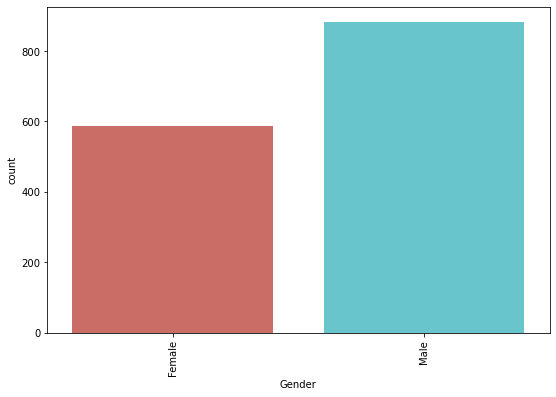

In [12]:
plt.figure(figsize=(9,6))
sns.countplot('Gender', data = df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

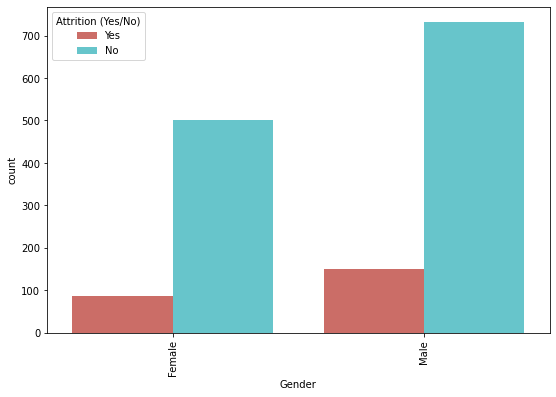

In [13]:
plt.figure(figsize=(9,6))
sns.countplot('Gender', hue = df['Attrition (Yes/No)'], 
              data = df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

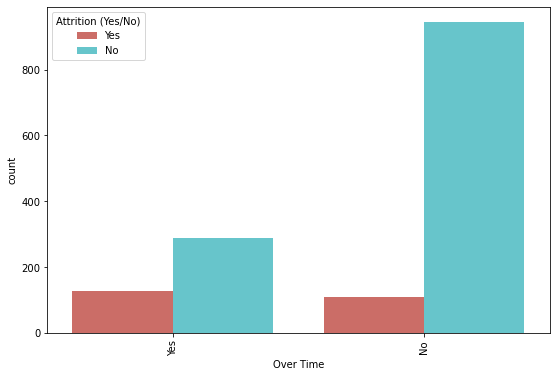

In [14]:
plt.figure(figsize=(9,6))
sns.countplot('Over Time', hue = df['Attrition (Yes/No)'], 
              data = df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

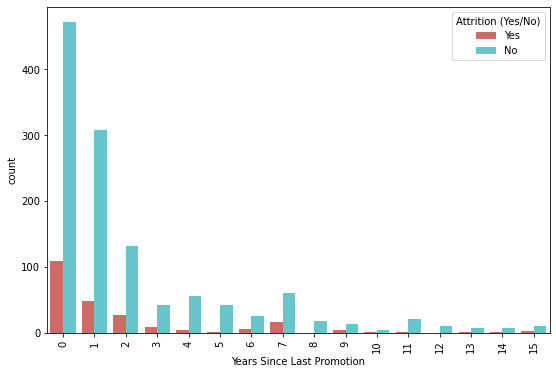

In [15]:
plt.figure(figsize=(9,6))
sns.countplot('Years Since Last Promotion', hue = df['Attrition (Yes/No)'], 
              data = df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

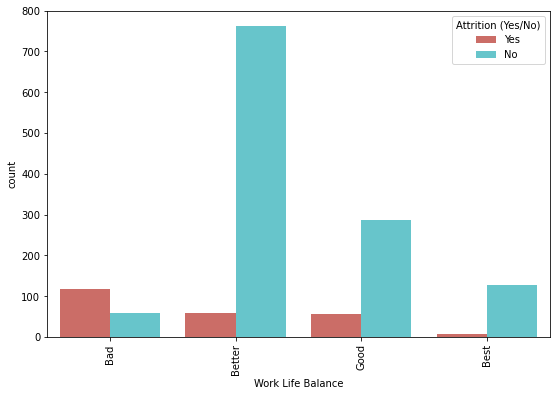

In [16]:
plt.figure(figsize=(9,6))
sns.countplot('Work Life Balance', hue = df['Attrition (Yes/No)'], 
              data = df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

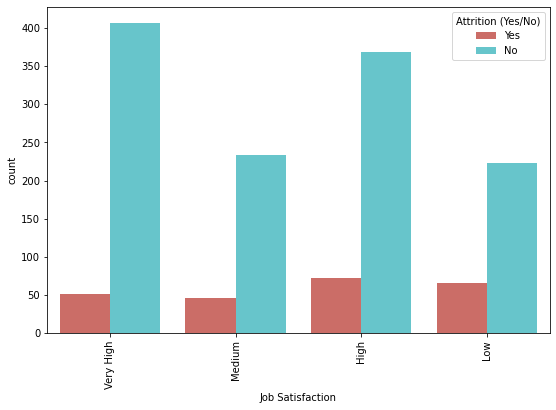

In [17]:
plt.figure(figsize=(9,6))
sns.countplot('Job Satisfaction', hue = df['Attrition (Yes/No)'], 
              data = df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

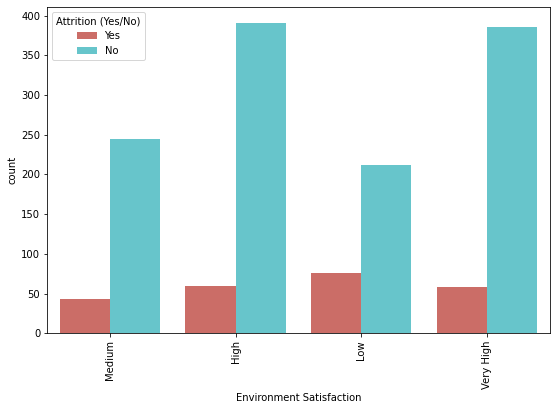

In [18]:
plt.figure(figsize=(9,6))
sns.countplot('Environment Satisfaction', hue = df['Attrition (Yes/No)'], 
              data = df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

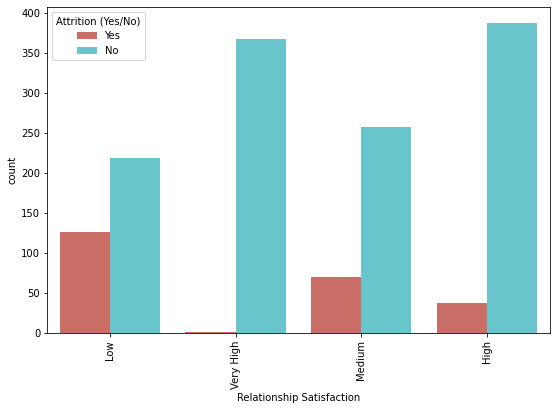

In [19]:
plt.figure(figsize=(9,6))
sns.countplot('Relationship Satisfaction', hue = df['Attrition (Yes/No)'], 
              data = df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

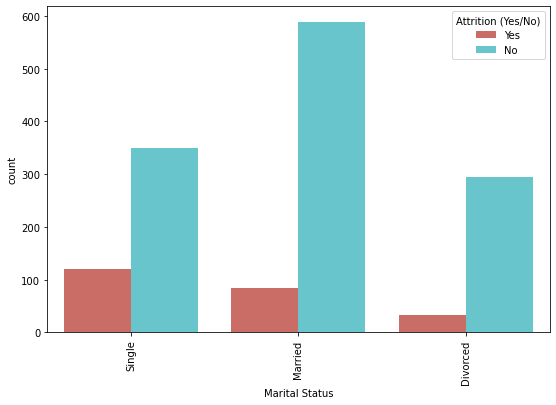

In [20]:
plt.figure(figsize=(9,6))
sns.countplot('Marital Status', hue = df['Attrition (Yes/No)'], 
              data = df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

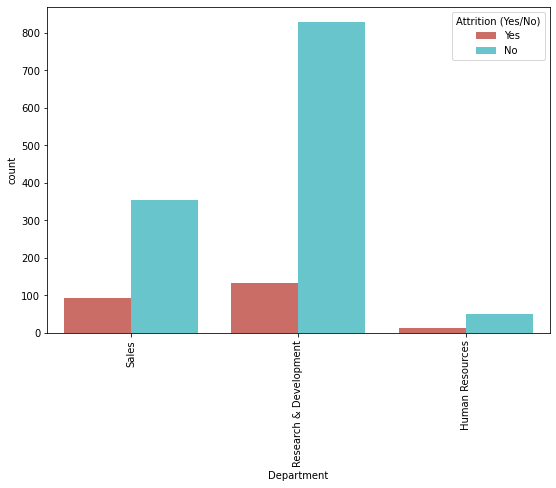

In [21]:
plt.figure(figsize=(9,6))
sns.countplot('Department', hue = df['Attrition (Yes/No)'], 
              data = df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

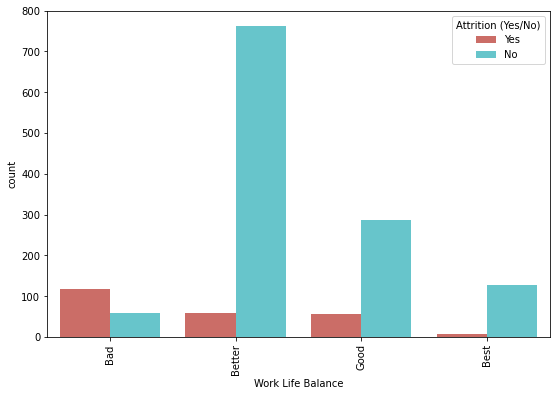

In [22]:
plt.figure(figsize=(9,6))
sns.countplot('Work Life Balance', hue = df['Attrition (Yes/No)'], 
              data = df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

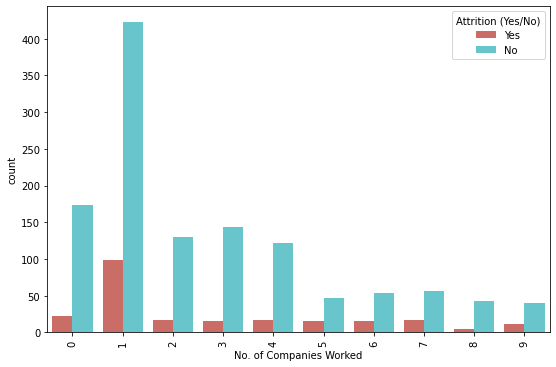

In [23]:

plt.figure(figsize=(9,6))
sns.countplot('No. of Companies Worked', hue = df['Attrition (Yes/No)'], 
              data = df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

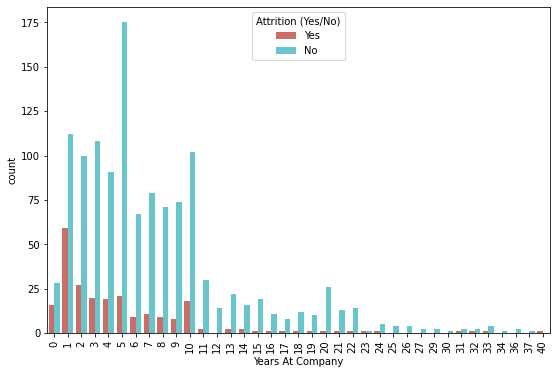

In [24]:
#Job Level
plt.figure(figsize=(9,6))
sns.countplot('Years At Company', hue = df['Attrition (Yes/No)'], 
              data = df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

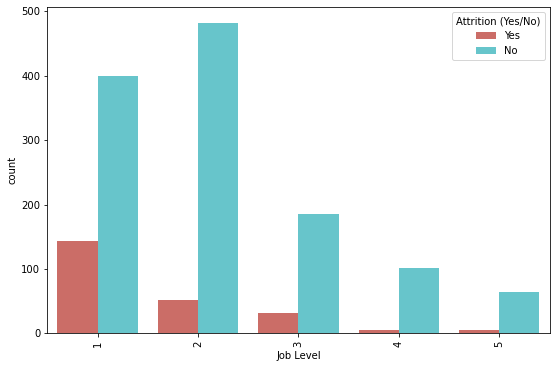

In [25]:
plt.figure(figsize=(9,6))
sns.countplot('Job Level', hue = df['Attrition (Yes/No)'], 
              data = df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

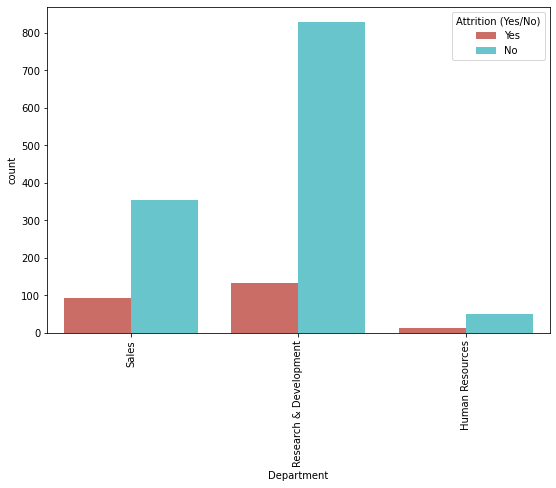

In [26]:

plt.figure(figsize=(9,6))
sns.countplot('Department', hue = df['Attrition (Yes/No)'], 
              data = df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [27]:
# Single people are likely to be leave more than married and divorced
# Employees having low relationship Satisfaction are likely to leave more
# Employees having bad work life balance are likely to leave more
# lower the job level higher the employee is likely to leave

In [28]:
corr_matrix=df.corr()
corr_matrix

,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Training Times Last Year
Employee Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employee ID,NaN,1.000000,-0.010145,0.032916,-0.018519,-0.014829,-0.000679,0.062227,0.001532,-0.014365,-0.011240,-0.008416,-0.009019,-0.009197,0.023603
Age,NaN,-0.010145,1.000000,-0.001686,0.509604,0.497855,0.040287,0.037510,0.299358,0.680381,0.311309,0.212901,0.216513,0.202089,-0.019621
Distance From Home (kms),NaN,0.032916,-0.001686,1.000000,0.005303,-0.017014,0.015960,0.044872,-0.027640,0.004628,0.009508,0.018845,0.010029,0.014406,-0.036942
Job Level,NaN,-0.018519,0.509604,0.005303,1.000000,0.950300,0.010361,0.013984,0.142812,0.782208,0.534739,0.389447,0.353885,0.375281,-0.018191
Monthly Income (USD),NaN,-0.014829,0.497855,-0.017014,0.950300,1.000000,0.015050,0.005408,0.149919,0.772893,0.514285,0.363818,0.344978,0.344079,-0.021736
Salary Hike (%),NaN,-0.000679,0.040287,0.015960,0.010361,0.015050,1.000000,0.041906,-0.000315,0.019554,-0.002812,0.031862,0.001454,0.016776,0.012065
Stock Option Level,NaN,0.062227,0.037510,0.044872,0.013984,0.005408,0.041906,1.000000,0.031647,0.010136,0.015058,0.050818,0.014352,0.024698,0.011274
No. of Companies Worked,NaN,0.001532,0.299358,-0.027640,0.142812,0.149919,-0.000315,0.031647,1.000000,0.238689,-0.118331,-0.090788,-0.035758,-0.110889,-0.062599
Total Working Years,NaN,-0.014365,0.680381,0.004628,0.782208,0.772893,0.019554,0.010136,0.238689,1.000000,0.628133,0.460365,0.404858,0.459188,-0.035662


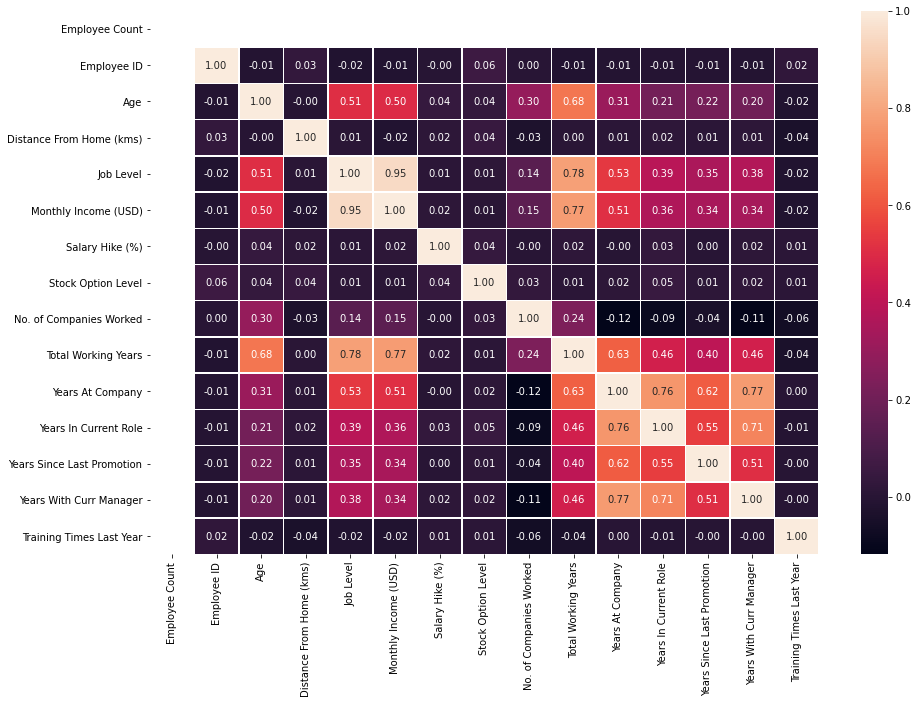

In [29]:
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [30]:
# Monthly income and total working years have strong relation
#job lvel and total working years have string correlation

<AxesSubplot:xlabel='Monthly Income (USD)', ylabel='Density'>

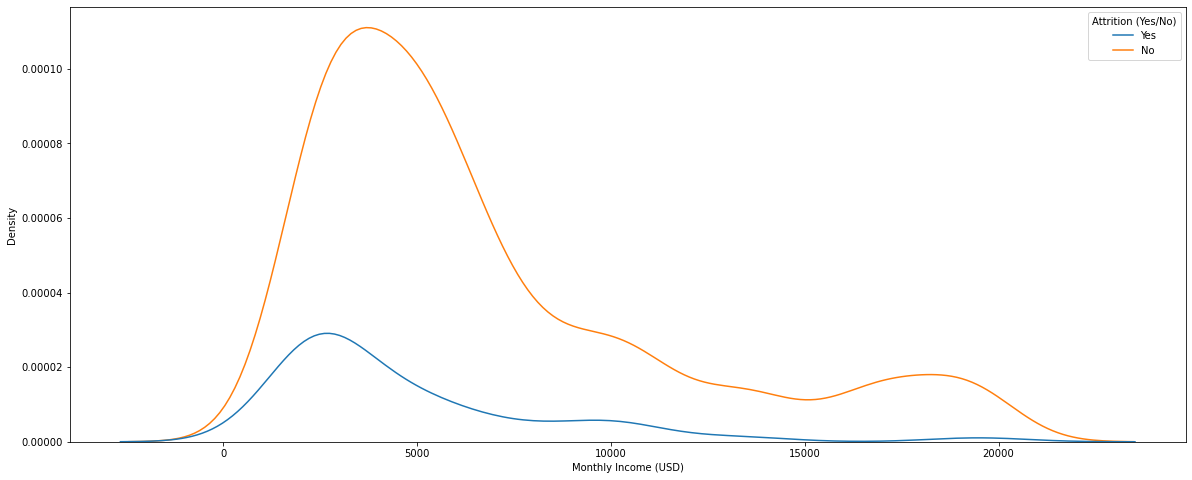

In [31]:
plt.figure(figsize=(20,8))
sns.kdeplot(data=df, x="Monthly Income (USD)", hue="Attrition (Yes/No)")

In [32]:
#Employees having salary between 0 to 5000 usd are likely to leave more than any other salary range

<AxesSubplot:xlabel='Age', ylabel='count'>

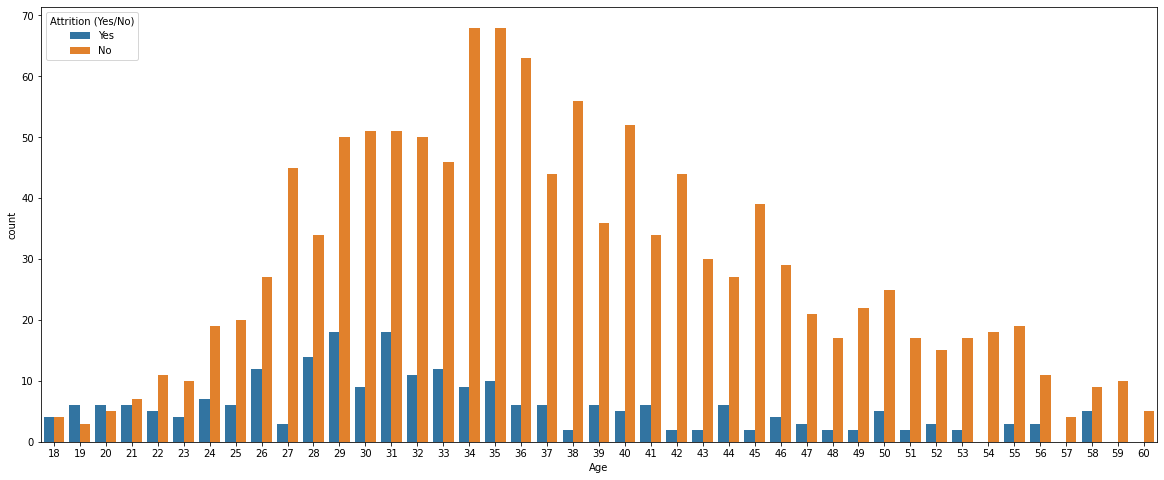

In [33]:
plt.figure(figsize=(20,8))
sns.countplot(df['Age'],hue=df['Attrition (Yes/No)'])

In [34]:
# Employees between 28 and 33 are likely to leave more

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Employee Count              1470 non-null   int64 
 1   Employee ID                 1470 non-null   int64 
 2   Department                  1470 non-null   object
 3   Job Role                    1470 non-null   object
 4   Gender                      1470 non-null   object
 5   Age                         1470 non-null   int64 
 6   Marital Status              1470 non-null   object
 7   Education                   1470 non-null   object
 8   Education Field             1470 non-null   object
 9   Business Travel             1470 non-null   object
 10  Distance From Home (kms)    1470 non-null   int64 
 11  Job Involvement             1470 non-null   object
 12  Job Level                   1470 non-null   int64 
 13  Job Satisfaction            1470 non-null   obje

<AxesSubplot:xlabel='Attrition (Yes/No)', ylabel='Age'>

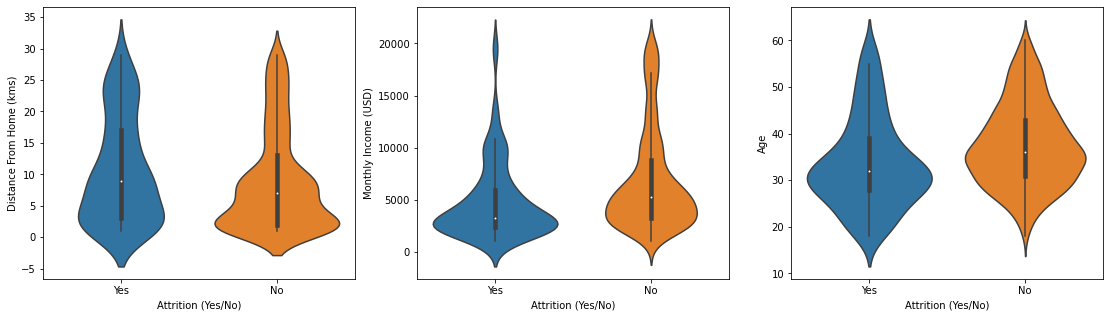

In [36]:
plt.figure(figsize=(19,5))
plt.subplot(1,3,1)
sns.violinplot('Attrition (Yes/No)','Distance From Home (kms)',data=df,orient="v")

plt.subplot(1,3,2)
sns.violinplot('Attrition (Yes/No)','Monthly Income (USD)',data=df,orient="v")

plt.subplot(1,3,3)
sns.violinplot('Attrition (Yes/No)','Age',data=df,orient="v")


<AxesSubplot:xlabel='Age', ylabel='Distance From Home (kms)'>

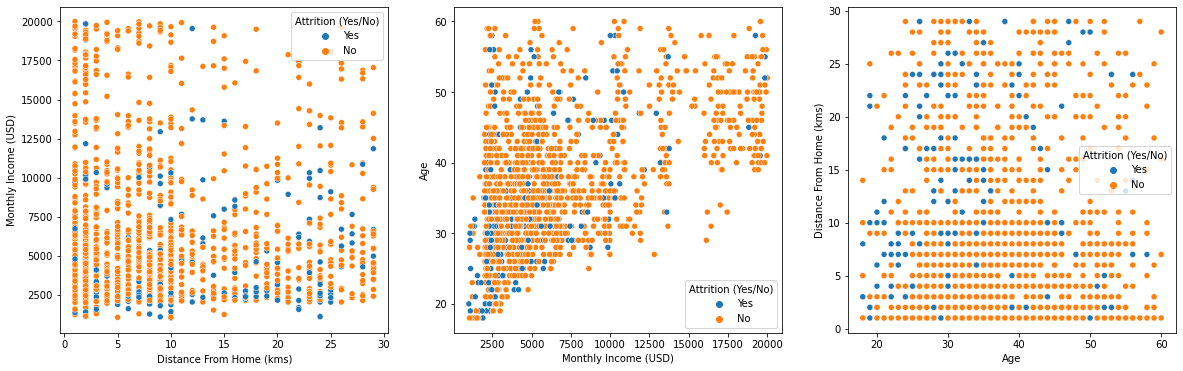

In [37]:
plt.figure(figsize=(20,6))


plt.subplot(1,3,1)
sns.scatterplot(df['Distance From Home (kms)'], df["Monthly Income (USD)"],hue=df['Attrition (Yes/No)'])

plt.subplot(1,3,2)
sns.scatterplot(df["Monthly Income (USD)"],df["Age"],hue=df['Attrition (Yes/No)'])

plt.subplot(1,3,3)
sns.scatterplot(df["Age"], df["Distance From Home (kms)"],hue=df['Attrition (Yes/No)'])


<AxesSubplot:>

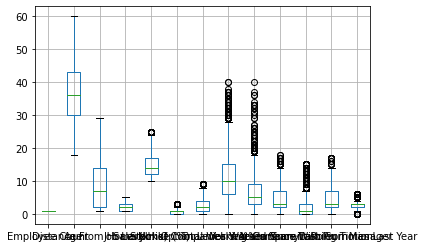

In [38]:
df.drop(['Monthly Income (USD)','Employee ID'],axis=1).boxplot()

In [39]:
#People having Age alomg with Monthly Income less likely to leave more

In [40]:
x_num=df.drop(['Employee Count','Employee ID'],axis=1).select_dtypes(include=[np.number])
x_cat=df.drop(['Attrition (Yes/No)'],axis=1).select_dtypes(include='object')

Department  vs Attrition (Yes/No)


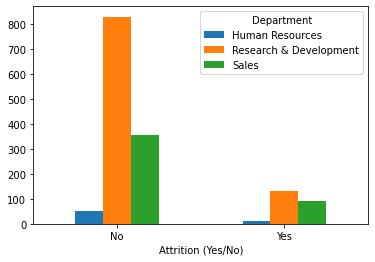

Job Role  vs Attrition (Yes/No)


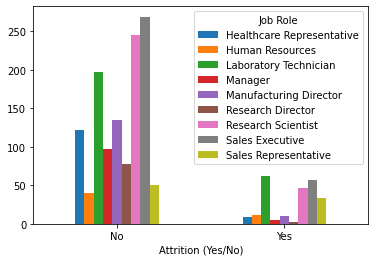

Gender  vs Attrition (Yes/No)


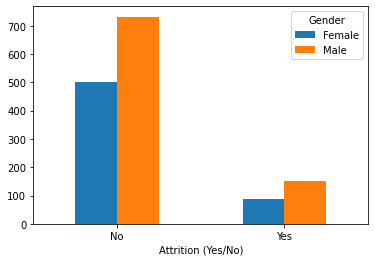

Marital Status  vs Attrition (Yes/No)


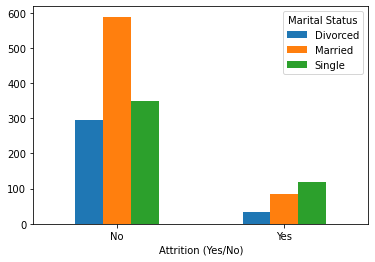

Education  vs Attrition (Yes/No)


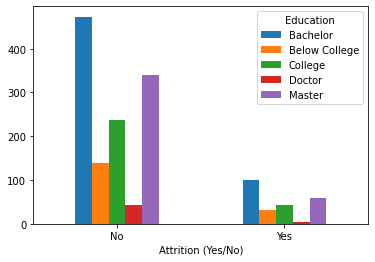

Education Field  vs Attrition (Yes/No)


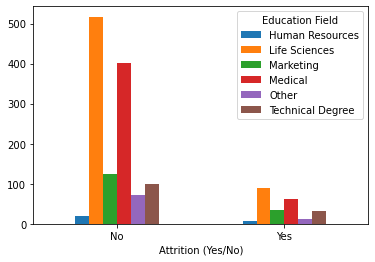

Business Travel  vs Attrition (Yes/No)


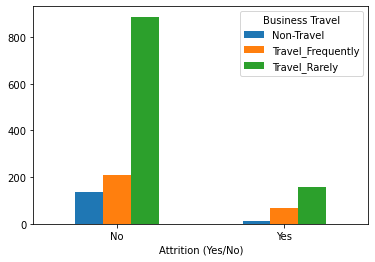

Job Involvement  vs Attrition (Yes/No)


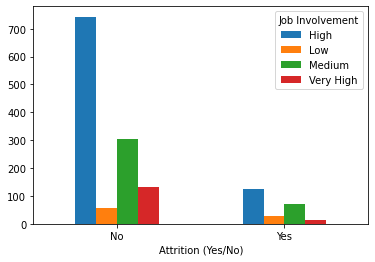

Job Satisfaction  vs Attrition (Yes/No)


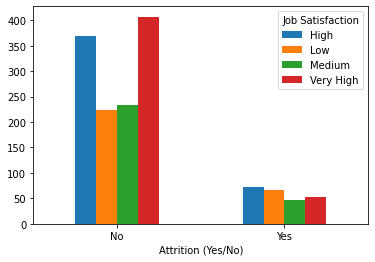

Over Time  vs Attrition (Yes/No)


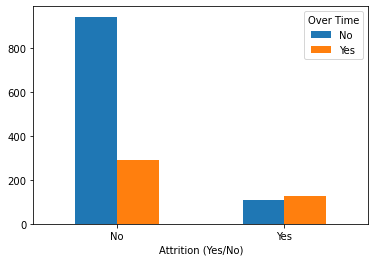

Environment Satisfaction  vs Attrition (Yes/No)


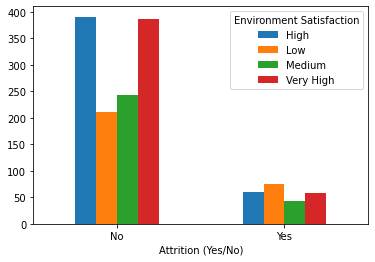

Work Life Balance  vs Attrition (Yes/No)


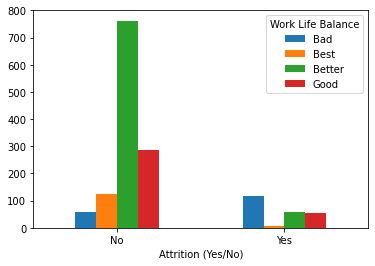

Relationship Satisfaction  vs Attrition (Yes/No)


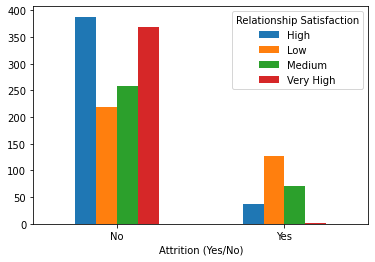

In [41]:
for i in x_cat.columns:
    pd.crosstab(df['Attrition (Yes/No)'],x_cat[i]).plot(kind='bar')
    plt.xticks(rotation=0)
    plt.title(print(i ,' vs Attrition (Yes/No)'))
    plt.show()

In [42]:
# Converting the Output Varible into Binary Variable using lable Encoding
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
df['Attrition (Yes/No)']= LE.fit_transform(df['Attrition (Yes/No)'])

In [43]:
# defining the dependent variable 
y= df['Attrition (Yes/No)']

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
X_Scaler=StandardScaler()
num_scaled=X_Scaler.fit_transform(x_num)
X_num_scaled = pd.DataFrame(num_scaled, columns = x_num.columns, index= df.index)
X_num_scaled

,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Training Times Last Year
0,0.446350,-1.010909,-0.057788,-0.108350,-1.118606,-0.932014,-0.276378,-0.421642,-0.164613,-0.063296,-0.679146,0.245834,-2.171982
1,1.322365,-0.147150,-0.057788,-0.291719,2.278228,0.241988,-0.677439,-0.164511,0.488508,0.764998,-0.368715,0.806541,0.155707
2,0.008343,-0.887515,-0.961486,-0.937654,0.013672,-0.932014,1.327869,-0.550208,-1.144294,-1.167687,-0.679146,-1.155935,0.155707
3,-0.429664,-0.764121,-0.961486,-0.763634,-1.118606,-0.932014,-0.677439,-0.421642,0.161947,0.764998,0.252146,-1.155935,0.155707
4,-1.086676,-0.887515,-0.961486,-0.644858,-0.835536,0.241988,2.531053,-0.678774,-0.817734,-0.615492,-0.058285,-0.595227,0.155707
5,-0.539166,-0.887515,-0.961486,-0.729850,-0.552467,-0.932014,-1.078501,-0.421642,-0.001333,0.764998,0.252146,0.526188,-0.620189
6,2.417384,-0.764121,-0.961486,-0.814416,1.429019,2.589994,0.525745,0.092620,-0.981014,-1.167687,-0.679146,-1.155935,0.155707
7,-0.758170,1.827158,-0.961486,-0.809529,1.995158,0.241988,-0.677439,-1.321601,-0.981014,-1.167687,-0.679146,-1.155935,-0.620189
8,0.117845,1.703764,0.845911,0.642338,1.712089,-0.932014,-1.078501,-0.164511,0.325228,0.764998,-0.368715,1.086895,-0.620189
9,-0.101159,2.197341,-0.057788,-0.268983,-0.552467,1.415991,1.327869,0.735447,-0.001333,0.764998,1.493867,0.806541,0.155707


In [46]:
# dummy variables for the categorical variable
dummy_var = pd.get_dummies(data = x_cat, drop_first = True)
dummy_var.columns

Index(['Department_Research & Development', 'Department_Sales',
       'Job Role_Human Resources', 'Job Role_Laboratory Technician',
       'Job Role_Manager', 'Job Role_Manufacturing Director',
       'Job Role_Research Director', 'Job Role_Research Scientist',
       'Job Role_Sales Executive', 'Job Role_Sales Representative',
       'Gender_Male', 'Marital Status_Married', 'Marital Status_Single',
       'Education_Below College', 'Education_College', 'Education_Doctor',
       'Education_Master', 'Education Field_Life Sciences',
       'Education Field_Marketing', 'Education Field_Medical',
       'Education Field_Other', 'Education Field_Technical Degree',
       'Business Travel_Travel_Frequently', 'Business Travel_Travel_Rarely',
       'Job Involvement_Low', 'Job Involvement_Medium',
       'Job Involvement_Very High', 'Job Satisfaction_Low',
       'Job Satisfaction_Medium', 'Job Satisfaction_Very High',
       'Over Time_Yes', 'Environment Satisfaction_Low',
       'Environme

In [47]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([X_num_scaled, dummy_var], axis = 1)

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  1470 non-null   float64
 1   Distance From Home (kms)             1470 non-null   float64
 2   Job Level                            1470 non-null   float64
 3   Monthly Income (USD)                 1470 non-null   float64
 4   Salary Hike (%)                      1470 non-null   float64
 5   Stock Option Level                   1470 non-null   float64
 6   No. of Companies Worked              1470 non-null   float64
 7   Total Working Years                  1470 non-null   float64
 8   Years At Company                     1470 non-null   float64
 9   Years In Current Role                1470 non-null   float64
 10  Years Since Last Promotion           1470 non-null   float64
 11  Years With Curr Manager       

In [49]:
#As data is unbalanced we will try some balancing techniques

In [50]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#vif = pd.DataFrame()
#vif["VIF Factor"] = [variance_inflation_factor(X_num_scaled.values, i) for i in range(X_num_scaled.shape[1])]
#vif["features"] = X_num_scaled.columns
#vif

In [51]:
#X_vif=X_num_scaled.drop(['Job Level','Monthly Income (USD)'],axis=1)

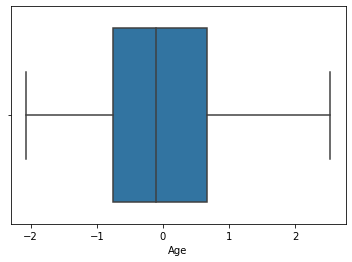

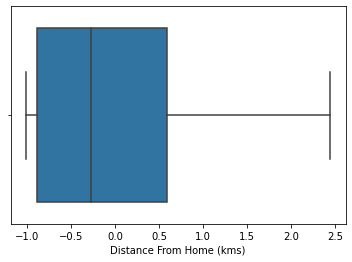

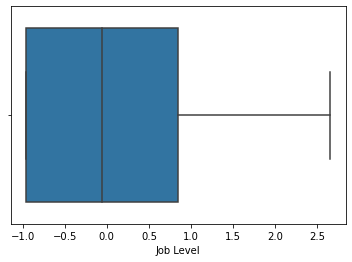

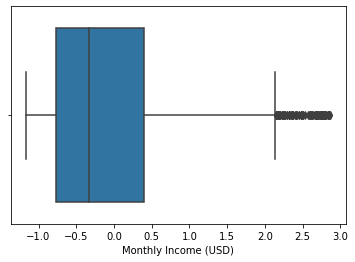

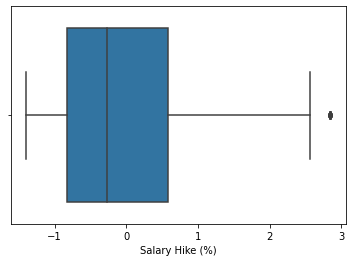

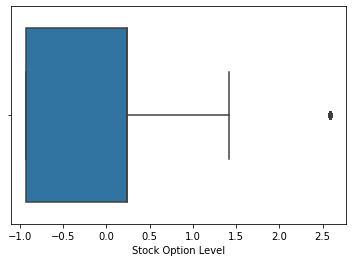

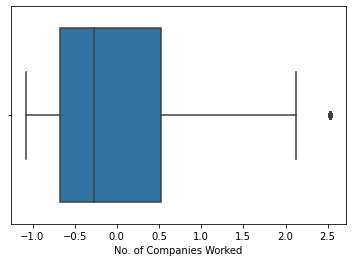

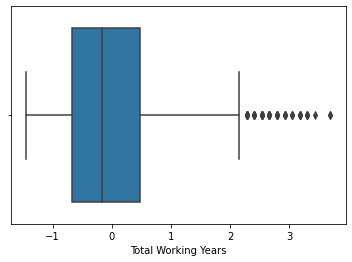

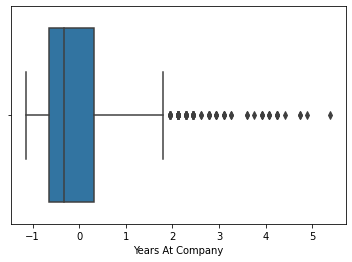

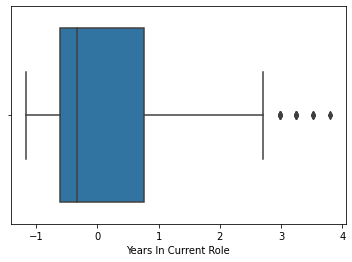

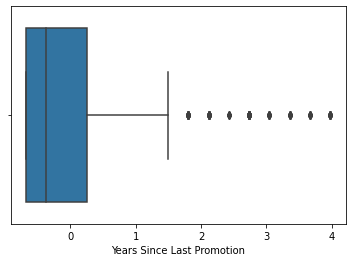

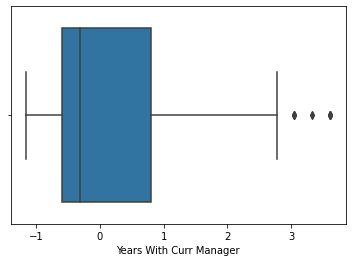

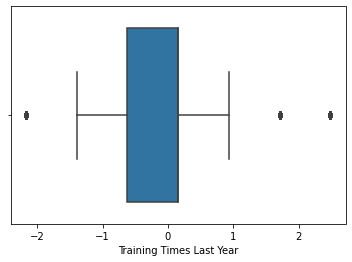

In [52]:
# Plotting Box plot for checking the Outliers of Numerical Features
for i in X_num_scaled.columns:
    sns.boxplot(X_num_scaled[i])
    plt.show()

# 2.Exploratory Data Analysis
Target Feature Balance Check

In [53]:
df['Attrition (Yes/No)'].value_counts()

0    1233
1     237
Name: Attrition (Yes/No), dtype: int64

<AxesSubplot:xlabel='Attrition (Yes/No)', ylabel='count'>

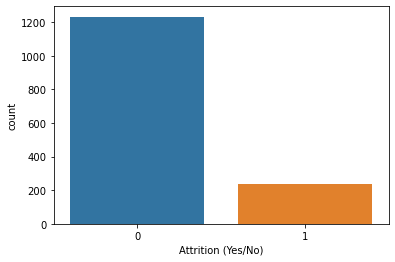

In [54]:
sns.countplot('Attrition (Yes/No)',data=df)

In [55]:
# Target Variable Imbalance detected...Lets use SMOTE in future to overcome this issue


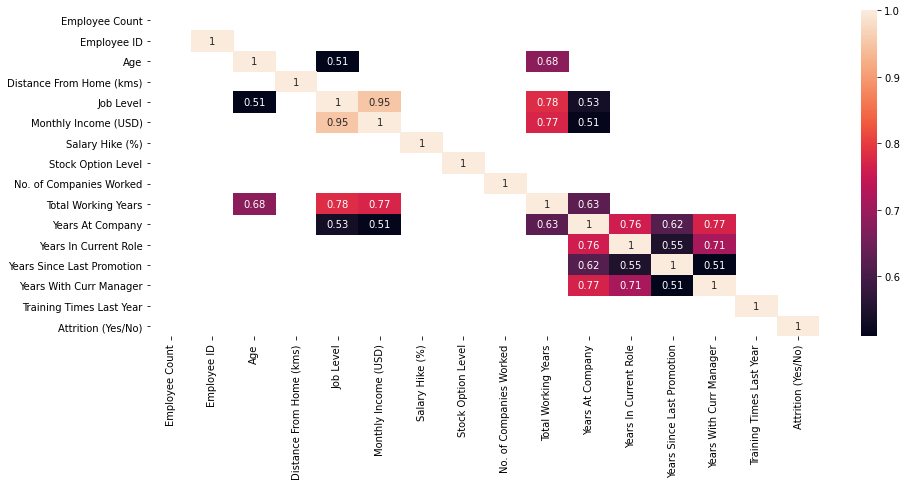

In [56]:
# Lets check the correlation Between the Numerical Features - Linear Relation between Two Numerical Features

plt.figure(figsize=(15,6))
sns.heatmap(df.corr()[(df.corr()>0.5) | (df.corr()< - 0.5)],annot=True)
plt.show()

# Model Building

In [57]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [58]:
def Logistic_model_insights(X_train, X_test, y_train, y_test,model_name, cut_off):
    y_pred_prob_test = model_name.predict(X_test)
    y_pred_prob_train = model_name.predict(X_train)
    #print(y_pred_prob.head())
    
    y_pred_test = [ 0 if x < cut_off else 1 for x in y_pred_prob_test]
    y_pred_train= [ 0 if x < cut_off else 1 for x in y_pred_prob_train]
    
    
    train_report= classification_report(y_train, y_pred_train)
    print("The Train data classification report")
    print (train_report)
    
    
    
    test_report= classification_report(y_test, y_pred_test)
    print("The Test data classification report") 
    print(test_report)
    
    fpr,tpr,thres = roc_curve(y_test,y_pred_prob_test)
    roc_df = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':thres})
    
    
    
    
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.plot(roc_df['FPR'],roc_df['TPR'])
    plt.plot([0,1],[0,1])
    
    plt.title('ROC curve for Attrition Prediction', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_test),4)))
    plt.grid(True)
    
    kappa = cohen_kappa_score(y_test, y_pred_test)

# print the kappa value
    print('kappa value:',kappa)
    

In [59]:
# creating user defined function for calculating Youden's Index
def Youdens_index(X_test, y_test, model_name):
    y_pred_prob_test = model_name.predict(X_test)
    fpr,tpr,thres = roc_curve(y_test,y_pred_prob_test)
    youdens_table = pd.DataFrame({'TPR': tpr,
                                 'FPR': fpr,
                                 'Threshold': thres})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
    youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
    youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
    return youdens_table.head(1)

In [60]:
def feature_importance(model_name,X_train):
    feat_imp=pd.Series(model_name.feature_importances_,index=X_train.columns)
    feat_imp.nlargest(10).plot(kind='barh')

In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score, roc_auc_score

score_card = pd.DataFrame(columns=['Model', 'Data Balanced/Imbalanced', 'Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

def Score_card_logistic(model_name, X_train, X_test, y_train, y_test, cut_off, data_status, Name_taken_for_model):    # data_status means balanced or imbalanced
    y_pred_prob= model_name.predict(X_test)
#    y_pred_train= model_name.predict(X_train)
    
#    y_pred_prob_train= [1 if i > cut_off else 0 for i in y_pred_train]
    y_pred=  [1 if i > cut_off else 0 for i in y_pred_prob]
    
     # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({ 'Model': Name_taken_for_model, 'Data Balanced/Imbalanced': data_status, 'Probability Cutoff': cut_off,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    

In [62]:
score_card_classification = pd.DataFrame(columns=['Model', 'Data Balanced/Imbalanced', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

def Score_card_classification(model_name, X_train, X_test, y_train, y_test, data_status, Name_model_taken_as):    # data_status means balanced or imbalanced
    y_pred= model_name.predict(X_test)

    
     # assign 'score_card' as global variable
    global score_card_classification

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card_classification = score_card_classification.append({'Model': Name_model_taken_as, 'Data Balanced/Imbalanced': data_status,
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [63]:
# train test split
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm

X= sm.add_constant(X)

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=10, test_size = 0.3, stratify= y) 
# stratify is used so that both train and test dataset represent the original data

In [64]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg_full = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg_full.summary())

         Current function value: 0.155372
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:     Attrition (Yes/No)   No. Observations:                 1029
Model:                          Logit   Df Residuals:                      975
Method:                           MLE   Df Model:                           53
Date:                Tue, 19 Jul 2022   Pseudo R-squ.:                  0.6484
Time:                        14:29:59   Log-Likelihood:                -159.88
converged:                      False   LL-Null:                       -454.67
Covariance Type:            nonrobust   LLR p-value:                 1.229e-91
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -20.8231   9229.670     -0.002      0.998   -1.81e+04   

C:\Users\clive\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Model 1 - Logistic Regression(Imbalaned)


In [65]:
# Initializing the logistic Regression
logreg = LogisticRegression()

# Fitting the Model
logreg.fit(X_train,y_train)

LogisticRegression()

The Train data classification report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       863
           1       0.89      0.70      0.78       166

    accuracy                           0.94      1029
   macro avg       0.92      0.84      0.87      1029
weighted avg       0.94      0.94      0.93      1029

The Test data classification report
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       370
           1       0.80      0.66      0.72        71

    accuracy                           0.92       441
   macro avg       0.87      0.81      0.84       441
weighted avg       0.91      0.92      0.92       441

kappa value: 0.67568230102958


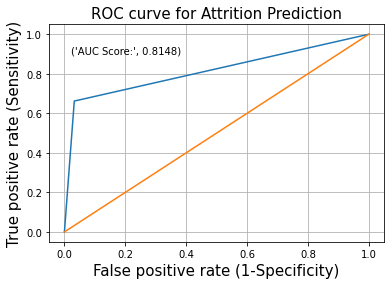

In [66]:
# Printing the Metrics
Logistic_model_insights(X_train, X_test, y_train, y_test,logreg, 0.5)

# Due to Accuracy Paradox, we should not judge accuracy score we will look for f1 score along with good recall

In [67]:
Score_card_logistic(logreg, X_train, X_test, y_train, y_test, 0.5, 'Imbalanced', 'Logreg')

In [68]:
score_card

,Model,Data Balanced/Imbalanced,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logreg,Imbalanced,0.5,0.81477,0.79661,0.661972,0.918367,0.675682,0.723077


[0.         0.66197183 1.        ]
[0.         0.03243243 1.        ]
[2 1 0]
0.8147696992767416
Threshold value is: 1


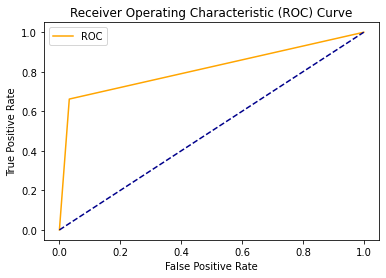

In [69]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

y_true = y_test
y_scores = logreg.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
print(tpr)
print(fpr)
print(thresholds)
print(roc_auc_score(y_true, y_scores))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [70]:
def Interpretation(model, X_train, X_test, y_train, y_test):
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)
    
    train_report= classification_report(y_train, y_pred_train)
    print("The Train data classification report")
    print (train_report)
    
    
    
    test_report= classification_report(y_test, y_pred_test)
    print("The Test data classification report") 
    print(test_report)

In [71]:
#Ridge Classifier

In [72]:
# Initializing the Ridge Regression
reg = RidgeClassifier(alpha=100)

# Fitting the training set
reg.fit(X_train,y_train)

RidgeClassifier(alpha=100)

In [73]:
Interpretation(reg, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       863
           1       0.98      0.36      0.53       166

    accuracy                           0.90      1029
   macro avg       0.94      0.68      0.74      1029
weighted avg       0.91      0.90      0.87      1029

The Test data classification report
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       370
           1       0.96      0.32      0.48        71

    accuracy                           0.89       441
   macro avg       0.92      0.66      0.71       441
weighted avg       0.90      0.89      0.86       441



In [74]:
Score_card_classification(reg.fit(X_train,y_train), X_train, X_test, y_train, y_test, 'Imbalanced', 'Ridge Classifier')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Ridge Classifier,Imbalanced,0.958333,0.323944,0.888889,0.438538,0.484211


# SMOTE - Synthetic Minority OverSampling Technique


In [75]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X_s,y_s = oversample.fit_resample(X_train,y_train)

# Model 2 - Logistic Regression(AFTER SMOTE)


In [76]:
# Trying Logistic Regression again after doing SMOTE
logreg_bal = LogisticRegression()

logreg_bal.fit(X_s,y_s)

LogisticRegression()

In [77]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg_bal = sm.Logit(y_s, X_s).fit()

# print the summary of the model
print(logreg_bal.summary())

Optimization terminated successfully.
         Current function value: 0.130888
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:     Attrition (Yes/No)   No. Observations:                 1726
Model:                          Logit   Df Residuals:                     1672
Method:                           MLE   Df Model:                           53
Date:                Tue, 19 Jul 2022   Pseudo R-squ.:                  0.8112
Time:                        14:29:59   Log-Likelihood:                -225.91
converged:                       True   LL-Null:                       -1196.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   8.8701      1.318

The Train data classification report
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       863
           1       0.95      0.94      0.94       863

    accuracy                           0.94      1726
   macro avg       0.95      0.94      0.94      1726
weighted avg       0.95      0.94      0.94      1726

The Test data classification report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       370
           1       0.70      0.69      0.70        71

    accuracy                           0.90       441
   macro avg       0.82      0.82      0.82       441
weighted avg       0.90      0.90      0.90       441

kappa value: 0.6370092456116843


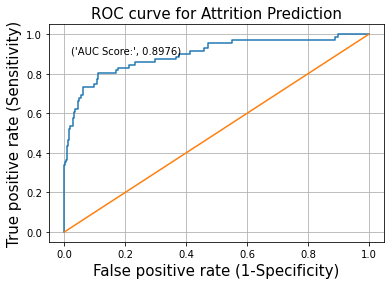

In [78]:
Logistic_model_insights(X_s, X_test, y_s, y_test,logreg_bal, 0.5)


In [79]:
Score_card_logistic(logreg_bal, X_s, X_test, y_s, y_test,0.5, 'Balanced', 'Log Reg(Bal)')
score_card

,Model,Data Balanced/Imbalanced,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logreg,Imbalanced,0.5,0.814770,0.79661,0.661972,0.918367,0.675682,0.723077
1,Log Reg(Bal),Balanced,0.5,0.816692,0.70000,0.690141,0.902494,0.637009,0.695035


In [80]:
# Initializing and Fitting the train set to retrieve the best set
rfe_model = RFE(estimator = LogisticRegression(),n_features_to_select=26)
rfe_model.fit(X_s,y_s)

RFE(estimator=LogisticRegression(), n_features_to_select=26)

In [81]:
# We are extracting the best features as per the rankings 
best_feature =  pd.DataFrame()

best_feature['Features'] = X_train.columns
best_feature['Ranking']= rfe_model.ranking_

best_features_list = list(best_feature[best_feature['Ranking'] ==1]['Features'])

In [82]:
best_features_list

['Total Working Years',
 'Department_Research & Development',
 'Department_Sales',
 'Job Role_Human Resources',
 'Job Role_Manager',
 'Job Role_Manufacturing Director',
 'Job Role_Research Director',
 'Marital Status_Married',
 'Education_College',
 'Education_Doctor',
 'Education Field_Life Sciences',
 'Education Field_Marketing',
 'Education Field_Medical',
 'Education Field_Other',
 'Education Field_Technical Degree',
 'Job Involvement_Very High',
 'Job Satisfaction_Medium',
 'Job Satisfaction_Very High',
 'Over Time_Yes',
 'Environment Satisfaction_Medium',
 'Environment Satisfaction_Very High',
 'Work Life Balance_Best',
 'Work Life Balance_Better',
 'Work Life Balance_Good',
 'Relationship Satisfaction_Low',
 'Relationship Satisfaction_Very High']

In [83]:
df_rfe=X[['Total Working Years',
 'Department_Research & Development',
 'Department_Sales',
 'Job Role_Human Resources',
 'Job Role_Manager',
 'Job Role_Manufacturing Director',
 'Job Role_Research Director',
 'Marital Status_Married',
 'Education_College',
 'Education_Doctor',
 'Education Field_Life Sciences',
 'Education Field_Marketing',
 'Education Field_Medical',
 'Education Field_Other',
 'Education Field_Technical Degree',
 'Job Involvement_Very High',
 'Job Satisfaction_Medium',
 'Job Satisfaction_Very High',
 'Over Time_Yes',
 'Environment Satisfaction_Medium',
 'Environment Satisfaction_Very High',
 'Work Life Balance_Best',
 'Work Life Balance_Better',
 'Work Life Balance_Good',
 'Relationship Satisfaction_Low',
 'Relationship Satisfaction_Very High']]

In [86]:
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm

X_s= sm.add_constant(X_s)

X_train, X_test, y_train, y_test= train_test_split(X_s, y_s, random_state=10, test_size = 0.3) 
# stratify is used so that both train and test dataset represent the original data

# Model 3 - Logistic Regression With Best Features


In [87]:
# Fitting the Train set
logreg_best = LogisticRegression()

logreg_best.fit(X_s[best_features_list],y_s)

LogisticRegression()

In [88]:
# User defined Function for printing Accuracy and Classification report
def print_metrics(model,X_ind,y_dep):
  # Accuracy of Training set
  print('Accuracy score :',model.score(X_ind,y_dep))
  print('\n')
  # Due to Accuracy Paradox, we should not judge accuracy score
  # Predicting target variable using the above model
  train_pred = model.predict(X_ind)

  # Printing the classification report
  print('Classification Report : \n\n', metrics.classification_report(y_dep,train_pred))

In [89]:
print_metrics(logreg_best,X_s[best_features_list],y_s)

Accuracy score : 0.9345307068366164


Classification Report : 

               precision    recall  f1-score   support

           0       0.93      0.94      0.94       863
           1       0.94      0.93      0.93       863

    accuracy                           0.93      1726
   macro avg       0.93      0.93      0.93      1726
weighted avg       0.93      0.93      0.93      1726



In [124]:
Interpretation(logreg_best,X_s[best_features_list] , X_test_rfe, y_s, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       863
           1       0.94      0.93      0.93       863

    accuracy                           0.93      1726
   macro avg       0.93      0.93      0.93      1726
weighted avg       0.93      0.93      0.93      1726

The Test data classification report
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       256
           1       0.92      0.92      0.92       262

    accuracy                           0.92       518
   macro avg       0.92      0.92      0.92       518
weighted avg       0.92      0.92      0.92       518



# Model 4 - Decision Tree


In [117]:
dt = DecisionTreeClassifier(max_depth = 3,random_state=10)

dt.fit(X_s[best_features_list],y_s)

dt_rfe=dt.score(X_s[best_features_list],y_s)
dt_rfe

0.8899188876013905

In [91]:
print_metrics(dt,X_s[best_features_list],y_s)


Accuracy score : 0.8899188876013905


Classification Report : 

               precision    recall  f1-score   support

           0       0.86      0.93      0.89       863
           1       0.92      0.85      0.89       863

    accuracy                           0.89      1726
   macro avg       0.89      0.89      0.89      1726
weighted avg       0.89      0.89      0.89      1726



# Model 5 - Random Forest


In [111]:
# Random Forest Classifier

rf = RandomForestClassifier(n_estimators=200,max_depth =3)

rf=rf.fit(X_s[best_features_list],y_s)

In [93]:
print_metrics(rf,X_s[best_features_list],y_s)


Accuracy score : 0.8661645422943222


Classification Report : 

               precision    recall  f1-score   support

           0       0.89      0.83      0.86       863
           1       0.84      0.90      0.87       863

    accuracy                           0.87      1726
   macro avg       0.87      0.87      0.87      1726
weighted avg       0.87      0.87      0.87      1726



In [112]:
Interpretation(rf,X_s[best_features_list] , X_test_rfe, y_s, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       863
           1       0.86      0.92      0.89       863

    accuracy                           0.89      1726
   macro avg       0.89      0.89      0.89      1726
weighted avg       0.89      0.89      0.89      1726

The Test data classification report
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       256
           1       0.84      0.90      0.87       262

    accuracy                           0.86       518
   macro avg       0.86      0.86      0.86       518
weighted avg       0.86      0.86      0.86       518



# Model 6 - Naive Bayes


In [101]:
# Naive Bayes

classifier = GaussianNB()  
gnb=classifier.fit(X_s[best_features_list], y_s)

In [95]:
print_metrics(classifier,X_s[best_features_list], y_s)


Accuracy score : 0.8047508690614137


Classification Report : 

               precision    recall  f1-score   support

           0       0.92      0.67      0.77       863
           1       0.74      0.94      0.83       863

    accuracy                           0.80      1726
   macro avg       0.83      0.80      0.80      1726
weighted avg       0.83      0.80      0.80      1726



In [110]:
X_test_rfe=X_test[best_features_list]


In [109]:
Interpretation(gnb,X_s[best_features_list] , X_test_rfe, y_s, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.92      0.67      0.77       863
           1       0.74      0.94      0.83       863

    accuracy                           0.80      1726
   macro avg       0.83      0.80      0.80      1726
weighted avg       0.83      0.80      0.80      1726

The Test data classification report
              precision    recall  f1-score   support

           0       0.92      0.65      0.76       256
           1       0.74      0.95      0.83       262

    accuracy                           0.80       518
   macro avg       0.83      0.80      0.80       518
weighted avg       0.83      0.80      0.80       518



# 1.HyperParameter Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV


In [98]:
# Decision Tree Hyper Parameter Tuning

dt_tuned_params = {'criterion' : ['entropy', 'gini'],'max_depth' : range(2, 10),'min_samples_split' :range(2,10)}

# Grid Search CV
dt_best_grid = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid=dt_tuned_params,cv=5)

dt_best_grid.fit(X_s[best_features_list],y_s)
dt_best_grid.best_params_

{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 4}

In [99]:
# Fitting the best params
dt_best = DecisionTreeClassifier(criterion= 'gini', max_depth= 8, min_samples_split= 6,random_state=10)

dt_best.fit(X_s[best_features_list],y_s)

DecisionTreeClassifier(max_depth=8, min_samples_split=6, random_state=10)

In [100]:
# Finding the Best Features
dt_best_features = pd.DataFrame()
dt_best_features['Features'] = X_s[best_features_list].columns
dt_best_features['scores'] = dt_best.feature_importances_
dt_best_features = dt_best_features.sort_values(by='scores',ascending=False)

dt_best_features

,Features,scores
22,Work Life Balance_Better,0.347339
21,Work Life Balance_Best,0.184450
23,Work Life Balance_Good,0.157077
0,Total Working Years,0.090857
25,Relationship Satisfaction_Very High,0.054759
24,Relationship Satisfaction_Low,0.032962
18,Over Time_Yes,0.018734
2,Department_Sales,0.017604
1,Department_Research & Development,0.015467
10,Education Field_Life Sciences,0.013725


# Some Interpretitions

### 1.Single people are likely to be leave more than married and divorced
### 2. Employees having low relationship Satisfaction are likely to leave more
### 3 Employees having bad work life balance are likely to leave more
###  4. lower the job level higher the employee is likely to leave

# Out of all models Logistic regression with best feature got high test f1 score of 0.92 so we choose ,
# Model 4 - Logistic Regression With Best Features as best model